# K-Means test tutorial
***
In this notebook, I'll try to use kMeans over a simple 2-features dataset (to plot the result), I'll eventually use and explain the Elbow and Silhouette evaluation methods.
First of all, we need to import **numpy** **matplotlib.pyplot** **pandas** and of course **kMeans**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kMeans import kMeans as km
from IPython.core.display import HTML

# set some good theme for the notebook
def _set_css_style(css_file_path):
   styles = open(css_file_path, "r").read()
   s = '<style>%s</style>' % styles     
   return HTML(s)
_set_css_style('./css/chesterish.css')

Now we import our dataset, thanks to Pandas this is going to be simple

In [5]:
data = pd.read_csv('./datasets/kmeans.csv')
print(data.head(4))

   ID    x1   x2
0   0  8.00  8.0
1   1  8.23  8.5
2   2  7.88  9.0
3   3  9.00  9.0


Next we convert our pandas DataFrame into a numpy array by:

In [6]:
X = data.to_numpy()
print(X[0:5, :]) # print first 5 rows

[[0.   8.   8.  ]
 [1.   8.23 8.5 ]
 [2.   7.88 9.  ]
 [3.   9.   9.  ]
 [4.   7.   9.  ]]


##### Let's try now to visualize the data and get insights about the number of clusters:
remark that the first column represent the sample key (ID) and the 2nd and 3rd column are the features of out training set, we'll name X1 and X2 the first and second respectively

In [7]:
X1 = X[:, 1]
X2 = X[:, 2]
print('_______________________________________________________________________________')
print('Feature1: ')
print(X1)
print('_______________________________________________________________________________')
print('Feature2:')
print(X2)

_______________________________________________________________________________
Feature1: 
[ 8.    8.23  7.88  9.    7.    7.5  10.    9.78  6.5   6.9  11.   -6.
 -6.23 -5.88 -7.   -5.   -5.5  -8.   -7.78 -4.5  -4.9  -9.   -6.   -6.23
 -5.88 -7.   -5.   -5.5  -8.   -7.78 -4.5  -4.9  -9.    4.5   4.73  4.38
  5.5   3.5   4.    6.5   6.28  3.    3.4   7.5  -5.   -4.   -2.5   5.
  4.    3.5   7.    5.  ]
_______________________________________________________________________________
Feature2:
[  8.     8.5    9.     9.     9.     8.25   7.5    5.9    6.5   10.
   5.5   -8.    -8.5   -9.    -9.    -9.    -8.25  -7.5   -5.9   -6.5
 -10.    -5.5    8.     8.5    9.     9.     9.     8.25   7.5    5.9
   6.5   10.     5.5  -11.5  -12.   -12.5  -12.5  -12.5  -11.75 -11.
  -9.4  -10.   -13.5   -9.     0.    -2.21  -0.99   0.     3.9    2.35
   3.    10.12]


***
Then and thanks to pyplot, we'll plot the two Features in 2D Space:

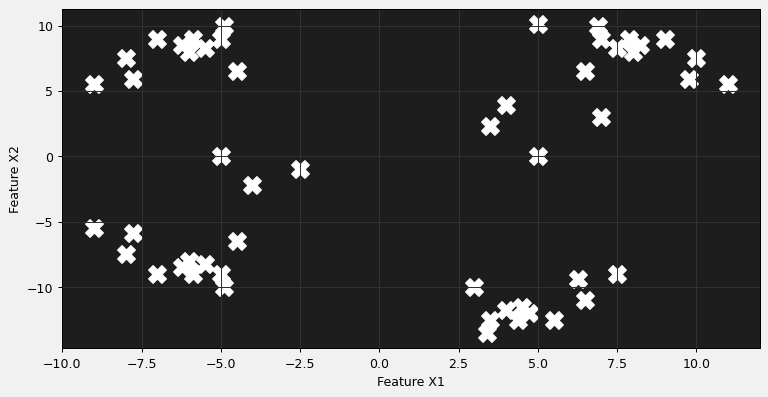

In [8]:
plt.figure(figsize=(10, 5), dpi=90, edgecolor='b', facecolor='#f1f1f1')
ax = plt.gca()
ax.set_facecolor('#1d1d1d')
ax.scatter(X1, X2, s=200, marker='X', c='w')

plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

plt.grid(color='#313131')
plt.show()

As we can see, 4 clusters would be a fair choice, now we'll apply k-means algorithm over the dataset:

In [9]:
X = X[:, 1:] # cut out the first columnt (contains IDs)

# let's create a kMeans object and fit X
model = km().fit(X, tol=0, verbose=1, n_clusters=4) # with verbose we can see the training progression

iteration  0  current_variation=  61.3092848778696  ex_variation=  inf
iteration  1  current_variation=  32.427648542057575  ex_variation=  61.3092848778696
iteration  2  current_variation=  32.427648542057575  ex_variation=  32.427648542057575


now let's get our clustered subsets and centroids

In [10]:
clusters = model.get_clusters() # get list of clusters (np arrays)
centroids = model.centroids # get list of centroids' coords (list of np arrays)
print(centroids)

[[  7.268125     6.6575    ]
 [  4.84454545 -11.42272727]
 [ -6.34454545   7.92272727]
 [ -5.80642857  -6.45357143]]


Now let's plot our 4 subsets with different shapes & colors to see how well did k-means performed

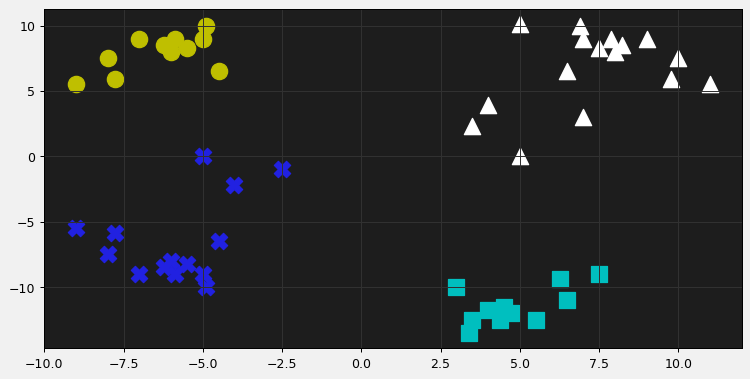

In [11]:
clust0 = clusters[0] # fisrt cluster
clust1 = clusters[1] # 2nd 
clust2 = clusters[2] # 3rd
clust3 = clusters[3] # 4th

plt.figure(figsize=(10, 5), dpi=90, edgecolor='b', facecolor='#f1f1f1') # creates a new figure to plot
ax_ = plt.gca()
ax_.set_facecolor('#1d1d1d')

ax_.scatter(clust0[:, 0], clust0[:, 1], s=170, marker='^', c='w') # plot 1st cluster with white triangles
ax_.scatter(clust1[:, 0], clust1[:, 1], s=170, marker='s', c='c') # plot 2nd with cyan squares
ax_.scatter(clust2[:, 0], clust2[:, 1], s=170, marker='o', c='y') # plot 3rd with yellow circles 
ax_.scatter(clust3[:, 0], clust3[:, 1], s=170, marker='X', c='#2121e1') # plor 4th with blue crosses

plt.grid(color='#313131')
plt.show() # show the plot

As we can see, K-Means has performed well! that's mainly due to the small amount of data and the low dimension (2 features only), add the fact we already knew the number of clusters from the beginning. K-Means is susceptible to local minimum and different centroids initializations can lead to different clustering, in the next section we'll see some evaluation methods which can help when trying to set the number of clusters.

# The Elbow's Methods
***

It simply consist of trying different successive number of clusters and choose the one from where the variation starts to decrease slowly (plotting may help recognize it):

In [24]:
elbow_clusters = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
elbow_vars = np.zeros((10, )) # variations

for i, clust in enumerate(elbow_clusters):
    elbow_vars[i] = km().fit(X, n_clusters=clust, verbose=0, tol=0).var_ # fit and return the variation
    print('for ', clust, ' number of cluster, the variation is: ', elbow_vars[i])

for  2  number of cluster, the variation is:  96.71541028257886
for  3  number of cluster, the variation is:  65.38360091721133
for  4  number of cluster, the variation is:  32.427648542057575
for  5  number of cluster, the variation is:  25.72255966160181
for  6  number of cluster, the variation is:  24.515135014563246
for  7  number of cluster, the variation is:  20.385830891299356
for  8  number of cluster, the variation is:  19.17840624426079
for  9  number of cluster, the variation is:  18.511336665179158
for  10  number of cluster, the variation is:  17.869479122347208
for  11  number of cluster, the variation is:  16.44221700814968


***
Now we plot the Elbow's curve and spot the right number of clusters !

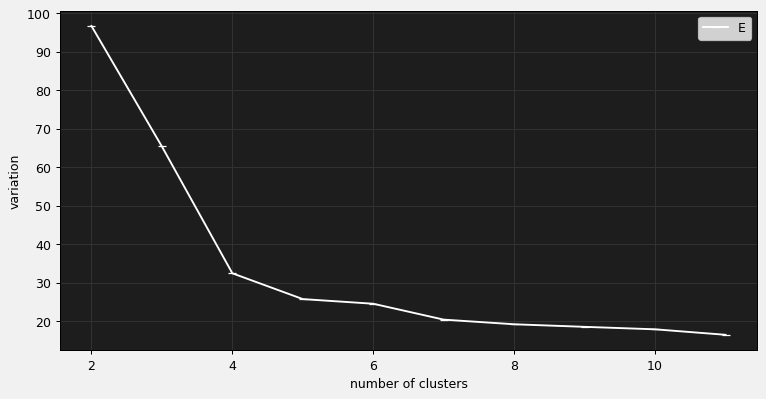

In [25]:
plt.figure(figsize=(10, 5), dpi=90, facecolor='#f1f1f1')
ax3 = plt.gca()
ax3.set_facecolor('#1d1d1d')
plt.plot(elbow_clusters, elbow_vars, marker='_', c='w')
plt.legend("Elbow's curve" )
plt.xlabel('number of clusters')
plt.ylabel('variation')

plt.grid(color='#313131')
plt.show()

As we can see, the curve starts to flatten from n = 4 clusters but the Elbow's method generally doesn't work well as it becomes hard to spot the good number of clusters when the curve doesn't flatten from a specific point, hopefully, another method comes to rescue.

# Silhouette Analysis
***
This method basically measure for each sample how similar it is to the members of its assigned cluster and how separate it is from the closest cluster, hopefully for us, the kMeans.compute_silhouette() method I implemented does its job and return the silouhette coeeficients for each sample inside his own array all regrouped in a list, all we have to do is compute the average for each cluster and maybe plot silhouettes for better insight: 

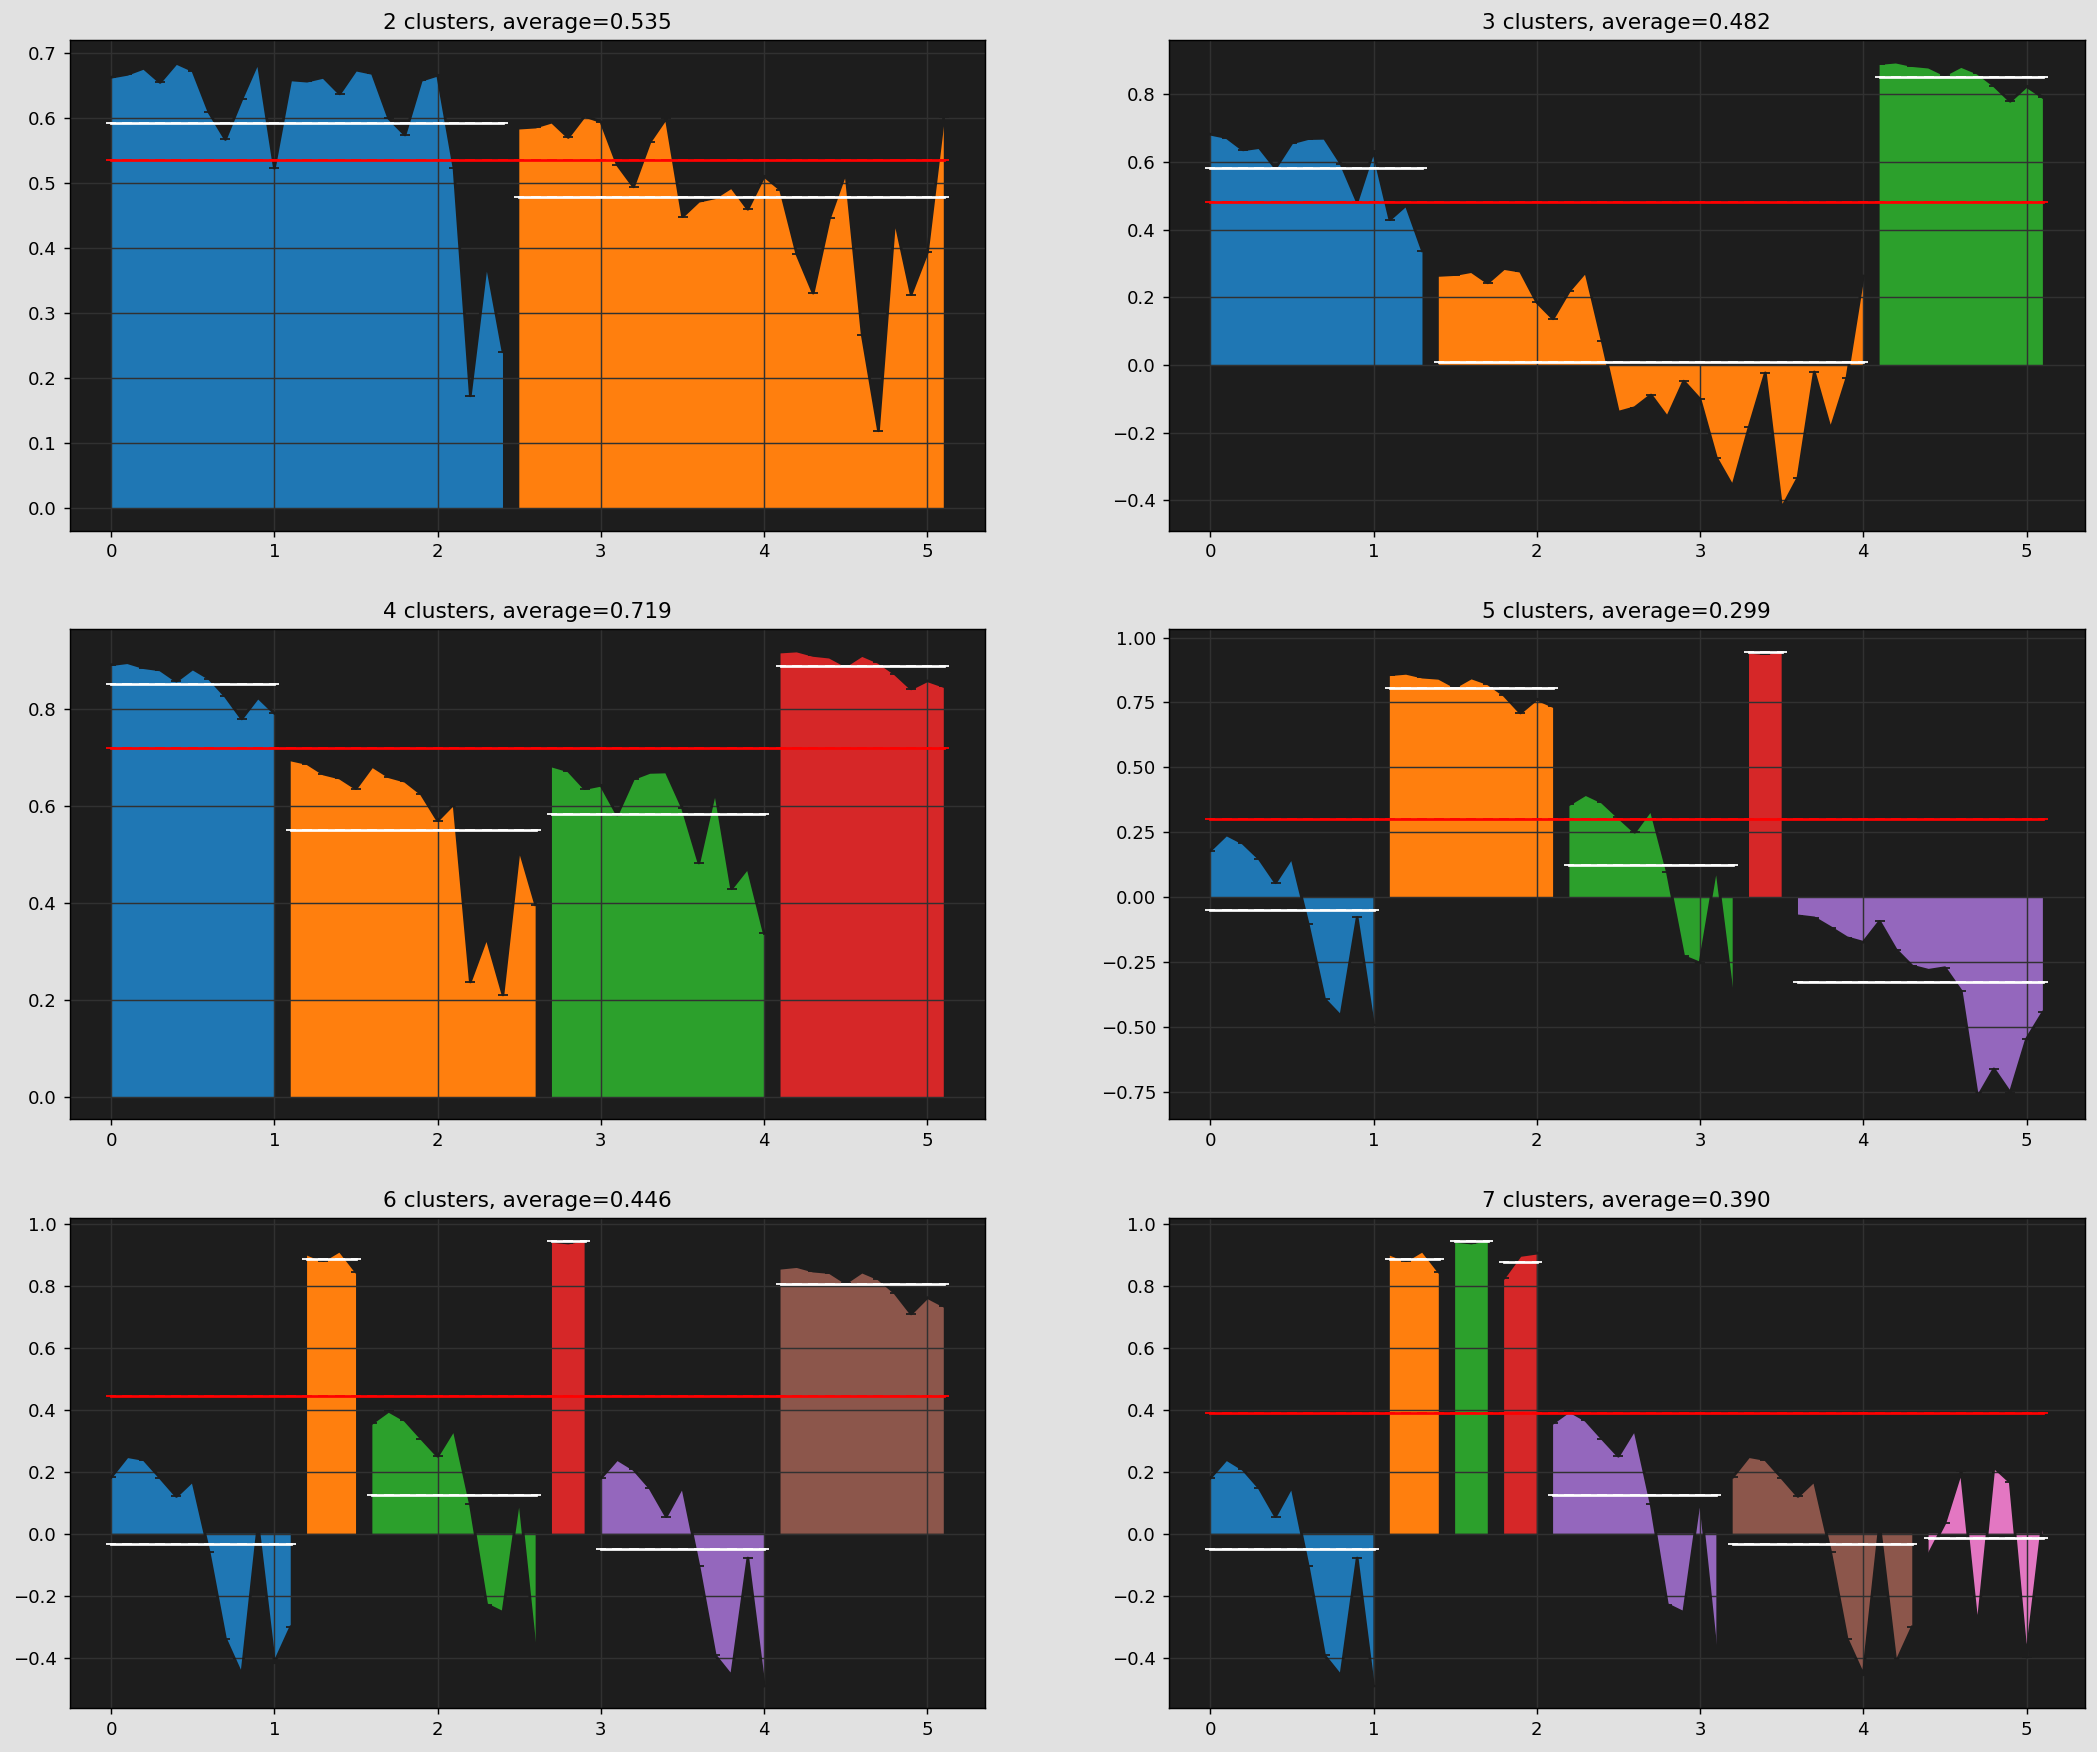

In [41]:
def plot_silhouettes(model_, ax):
    silhouettes = model_.compute_silhouette()
    clusters_ = model_.get_clusters()
    n_samples = len(model_.aff_)
    
    beg = 0 # offset        
    cum_mean = 0 # cumulative in-cluster silhouettes' mean

    for i in range(model_.n_clusters):
        nS = len(clusters_[i])
        sil = silhouettes[i]
        sil_range = np.arange(beg, np.float32(beg + 0.1 *  nS), 0.1) # create a range for the current cluster based on the number of samples i holds

        if(len(sil_range) > len(sil)): # correct range
            sil_range = sil_range[0:-1]
        
        ax.plot(sil_range, sil, marker='_', c='#1d1d1d') # plot the cluster's silhouette
        ax.fill_between(sil_range, 0, sil) # fill below
        # now let's plot the cluster average
        mean_ = np.mean(sil) # compute in-cluster silhouettes' mean
        cum_mean += mean_
        mean_ = np.tile(mean_, (nS, ) )
        ax.plot(sil_range, mean_ , marker='_', c='w') # plot cluster's silhouette
        beg = np.float32(beg + 0.1 * nS)  # prepare next range
        
    cum_mean /= model_.n_clusters
    cum_mean_y = np.tile(cum_mean, (n_samples, ) )
    cum_mean_range = np.arange(0, n_samples * 0.1, 0.1)
    ax.plot(cum_mean_range, cum_mean_y , marker='_', c='r') # plot the silhouettes' average
    ax.grid(color='#313131') # grid the plot
    ax.set_facecolor('#1d1d1d')
    ax.set_title("{0} clusters, average={1:.3f}".format(len(clusters_), cum_mean))
    return cum_mean # return average mean

# now, let's use the above function to plot for different number of clusters and compare between
try_clusters = [2, 3, 4, 5, 6, 7]

#plt.figure(figsize=(10, 4), dpi=90, facecolor='#e1e1e1') # new figure
fig, axes = plt.subplots(3, 2, figsize=(20, 17), dpi=130, facecolor='#e1e1e1')

for i in try_clusters:
    try_model = km().fit(X, verbose=0, tol=0, n_clusters=i)
    sub_x = int((i - 2) / 2)
    sub_y = (i - 2) % 2
    plot_silhouettes(try_model, ax=axes[sub_x, sub_y])

As we can see, the model providing the best silouettes' coefficients average is the 4-clusters, and that's right! generally the silhouette metric is far better than the elbow method.

# Some references
***

1. [K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks Medium Article by Imad Dabbura](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)

2. [k-keans clustering on Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

3. [Coursera Andrew Ng's Machine Learning course (Unsupervised Learning Week)](https://www.coursera.org/)